In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/from-data-entry-to-ceo-the-ai-job-threat-index/My_Data.csv


In [2]:
import pandas as pd

# Loading the CSV file into a dataframe
data_df = pd.read_csv('/kaggle/input/from-data-entry-to-ceo-the-ai-job-threat-index/My_Data.csv')

# Displaying the first few rows of the dataset to get an overview
data_df.head()


,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


In [3]:
# Convert the 'AI Impact' column from string percentage to float for sorting purposes
data_df['AI Impact'] = data_df['AI Impact'].str.rstrip('%').astype(float) / 100

# Sorting the dataset based on 'AI Impact' in descending order to get the top impacted jobs
top_impacted_jobs = data_df.sort_values(by='AI Impact', ascending=False).head(10)

top_impacted_jobs[['Job titiles', 'AI Impact']]


,Job titiles,AI Impact
0,Communications Manager,0.98
2,Data Entry,0.95
3,Mail Clerk,0.95
1,Data Collector,0.95
4,Compliance Officer,0.92
5,Chief Executive Officer (CEO),0.91
13,Data Entry Operator,0.90
19,Web Search Evaluator,0.90
18,Warehouse Worker,0.90
17,Supply Clerk,0.90


In [4]:
# Grouping by 'Domain' and calculating the mean AI Impact for each domain
domain_impact = data_df.groupby('Domain')['AI Impact'].mean().sort_values(ascending=False)

domain_impact


Domain
Communication & PR           0.303885
Data & IT                    0.303546
Administrative & Clerical    0.303397
Leadership & Strategy        0.303248
Law Enforcement              0.303085
Medical & Healthcare         0.302951
Construction                 0.302936
Sales & Marketing            0.302809
Supply Chain & Logistics     0.302739
Hospitality                  0.302660
Name: AI Impact, dtype: float64

In [5]:
# Calculating the correlation between 'Tasks' and 'AI models'
correlation = data_df[['Tasks', 'AI models']].corr()

correlation_value = correlation.loc['Tasks', 'AI models']
correlation_value


0.9283496035606295

In [6]:
import numpy as np

# Checking for non-finite values (like NaN or infinity) in the AI_Workload_Ratio column
non_finite_values = data_df[~data_df['AI_Workload_Ratio'].apply(np.isfinite)]

non_finite_values[['Job titiles', 'AI_Workload_Ratio']]


,Job titiles,AI_Workload_Ratio
3034,Charter Pilot,inf
3035,Commercial Pilot,inf
3036,Conductor,inf
3037,Corporate Pilot,inf
3184,Dog Groomer,inf
3211,Constable,inf
3322,Crossing Guard,inf


In [7]:
import matplotlib.pyplot as plt

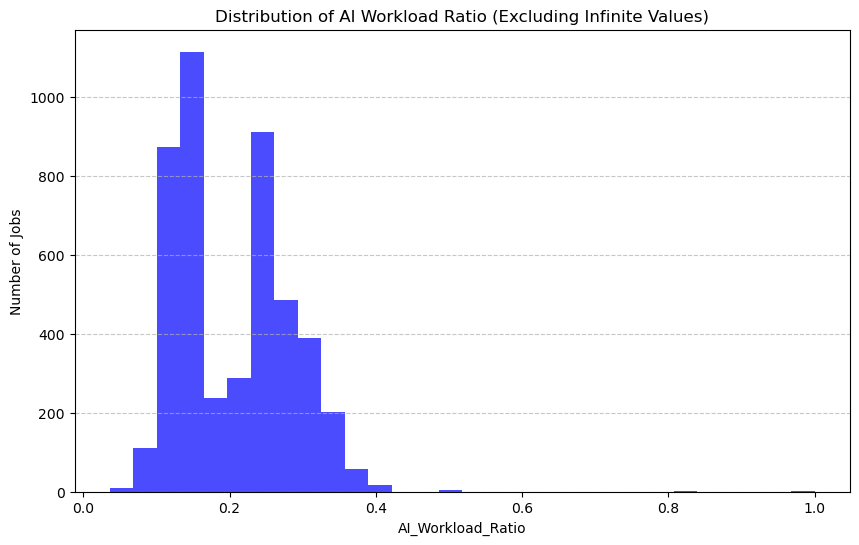

In [8]:
# Filtering out non-finite values from AI_Workload_Ratio for visualization
filtered_df = data_df[data_df['AI_Workload_Ratio'].apply(np.isfinite)]

# Plotting the distribution of AI_Workload_Ratio after filtering
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['AI_Workload_Ratio'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of AI Workload Ratio (Excluding Infinite Values)')
plt.xlabel('AI_Workload_Ratio')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
# Sorting the dataset based on 'AI Impact' in ascending order to get the least impacted jobs
least_impacted_jobs = data_df.sort_values(by='AI Impact', ascending=True).head(10)

least_impacted_jobs[['Job titiles', 'AI Impact']]


,Job titiles,AI Impact
4705,Technician,0.05
4552,Lead Pastor,0.05
4551,Deaconess,0.05
4550,Bishop,0.05
4549,Zoologist,0.05
4548,Veterinary,0.05
4547,Veterinarian,0.05
4546,Ranch Manager,0.05
4545,Ranch Hand,0.05
4544,Marine Mammal Trainer,0.05


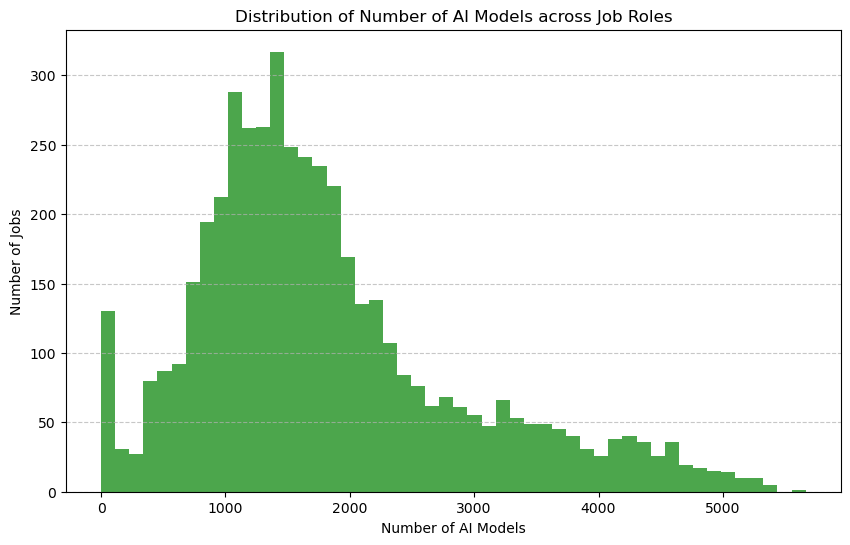

In [10]:
# Plotting the distribution of the number of AI models across job roles
plt.figure(figsize=(10, 6))
plt.hist(data_df['AI models'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Number of AI Models across Job Roles')
plt.xlabel('Number of AI Models')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [11]:
# Sorting the dataset based on 'Tasks' in descending order to get the jobs with the highest task complexity
most_complex_jobs = data_df.sort_values(by='Tasks', ascending=False).head(10)

most_complex_jobs[['Job titiles', 'Tasks']]


,Job titiles,Tasks
3521,Instructional Designer,1387
3397,Senior Technical Writer,1358
3414,Program Administrator,1339
3415,Program Associate,1329
4703,Director,1316
3644,Manager,1316
3400,Writer,1314
3396,Script Writer,1299
3763,Design Manager,1297
4006,Learning And Development Specialist,1290


In [12]:
# Grouping by 'Domain' and calculating the mean number of AI models for each domain
domain_ai_models = data_df.groupby('Domain')['AI models'].mean().sort_values(ascending=False)

domain_ai_models


Domain
Hospitality                  1869.451064
Sales & Marketing            1855.704255
Construction                 1849.408511
Communication & PR           1836.957537
Leadership & Strategy        1817.467091
Data & IT                    1814.462845
Administrative & Clerical    1808.208068
Supply Chain & Logistics     1786.021231
Law Enforcement              1778.427660
Medical & Healthcare         1760.847134
Name: AI models, dtype: float64

In [13]:
# Calculating the correlation between 'AI Impact' and 'AI_Workload_Ratio'
correlation_impact_workload = data_df[['AI Impact', 'AI_Workload_Ratio']].corr()

correlation_value_impact_workload = correlation_impact_workload.loc['AI Impact', 'AI_Workload_Ratio']
correlation_value_impact_workload


-0.2878708726490437

In [14]:
# Calculating the correlation between 'Tasks' and 'AI Impact'
correlation_tasks_impact = data_df[['Tasks', 'AI Impact']].corr()

correlation_value_tasks_impact = correlation_tasks_impact.loc['Tasks', 'AI Impact']
correlation_value_tasks_impact


-0.4197595382909163

In [15]:
# Grouping by 'Domain' and calculating the total number of tasks for each domain
domain_task_count = data_df.groupby('Domain')['Tasks'].sum().sort_values(ascending=False)

domain_task_count


Domain
Hospitality                  195841
Sales & Marketing            193988
Construction                 193045
Law Enforcement              188565
Communication & PR           187881
Leadership & Strategy        187825
Administrative & Clerical    186362
Supply Chain & Logistics     185271
Data & IT                    184845
Medical & Healthcare         182109
Name: Tasks, dtype: int64

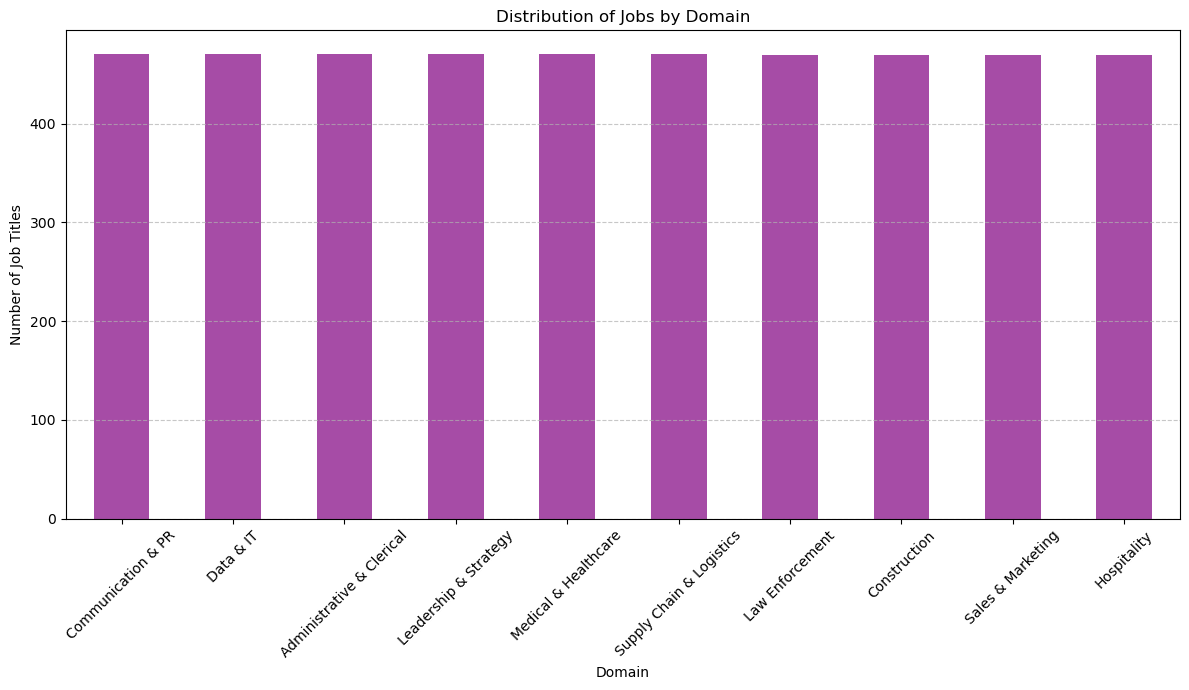

In [16]:
# Counting the number of job titles for each domain
job_count_by_domain = data_df['Domain'].value_counts()

# Plotting the distribution of jobs by domain
plt.figure(figsize=(12, 7))
job_count_by_domain.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Distribution of Jobs by Domain')
plt.xlabel('Domain')
plt.ylabel('Number of Job Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [17]:
# Sorting the dataset based on 'AI_Workload_Ratio' in ascending order to get the jobs with the lowest AI_Workload_Ratio
least_ai_workload_jobs = filtered_df.sort_values(by='AI_Workload_Ratio', ascending=True).head(10)

least_ai_workload_jobs[['Job titiles', 'AI_Workload_Ratio']]


,Job titiles,AI_Workload_Ratio
16,Street Sweeper,0.036585
431,Carpet Cleaner,0.045113
455,General Worker,0.046455
454,General Labor,0.046455
432,Custodian,0.052980
21,Delivery Driver,0.064725
300,Janitor,0.065217
434,Housekeeping Attendant,0.065217
433,General Laborer,0.065217
3305,Short Order Cook,0.067879


In [18]:
# Calculating the correlation between 'AI models' and 'AI_Workload_Ratio'
correlation_models_workload = data_df[['AI models', 'AI_Workload_Ratio']].corr()

correlation_value_models_workload = correlation_models_workload.loc['AI models', 'AI_Workload_Ratio']
correlation_value_models_workload


0.3468932697799075

In [19]:
# Grouping by 'Domain' and calculating the median number of tasks for each domain (using median to reduce the effect of outliers)
domain_task_median = data_df.groupby('Domain')['Tasks'].median().sort_values(ascending=False)

domain_task_median


Domain
Leadership & Strategy        281.0
Hospitality                  280.0
Sales & Marketing            277.0
Communication & PR           273.0
Law Enforcement              270.5
Administrative & Clerical    270.0
Construction                 266.5
Data & IT                    262.0
Supply Chain & Logistics     259.0
Medical & Healthcare         255.0
Name: Tasks, dtype: float64

In [20]:
# Calculating AI Model-to-Task Ratio
data_df['AI Model-to-Task Ratio'] = data_df['AI models'] / data_df['Tasks']

# Sorting the dataset based on the ratio
highest_ratio_jobs = data_df.sort_values(by='AI Model-to-Task Ratio', ascending=False).head(10)
lowest_ratio_jobs = data_df.sort_values(by='AI Model-to-Task Ratio', ascending=True).head(10)

highest_ratio_jobs[['Job titiles', 'AI Model-to-Task Ratio']], lowest_ratio_jobs[['Job titiles', 'AI Model-to-Task Ratio']]


(                 Job titiles  AI Model-to-Task Ratio
 16            Street Sweeper               27.333333
 431           Carpet Cleaner               22.166667
 454            General Labor               21.526316
 455           General Worker               21.526316
 432                Custodian               18.875000
 21           Delivery Driver               15.450000
 433          General Laborer               15.333333
 300                  Janitor               15.333333
 434   Housekeeping Attendant               15.333333
 3305        Short Order Cook               14.732143,
                Job titiles  AI Model-to-Task Ratio
 3322        Crossing Guard                     0.0
 3034         Charter Pilot                     0.0
 3184           Dog Groomer                     0.0
 3035      Commercial Pilot                     0.0
 3036             Conductor                     0.0
 3037       Corporate Pilot                     0.0
 3211             Constable              

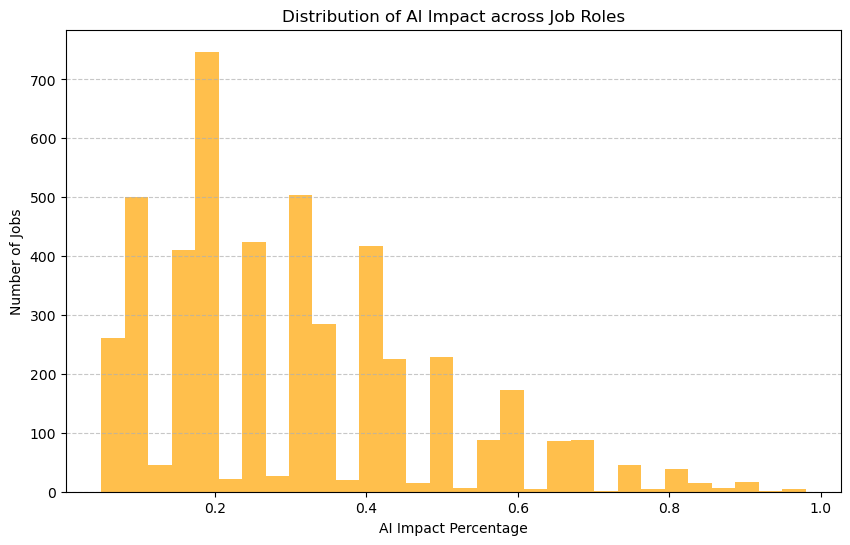

In [21]:
# Plotting the distribution of AI Impact across all job roles
plt.figure(figsize=(10, 6))
plt.hist(data_df['AI Impact'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of AI Impact across Job Roles')
plt.xlabel('AI Impact Percentage')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [22]:
# Grouping by 'Domain' and calculating the standard deviation of AI Impact for each domain
domain_impact_std = data_df.groupby('Domain')['AI Impact'].std().sort_values(ascending=False)

domain_impact_std


Domain
Communication & PR           0.183392
Data & IT                    0.182912
Leadership & Strategy        0.182792
Administrative & Clerical    0.182720
Medical & Healthcare         0.182288
Supply Chain & Logistics     0.182059
Law Enforcement              0.181620
Construction                 0.181514
Sales & Marketing            0.181453
Hospitality                  0.181346
Name: AI Impact, dtype: float64

In [23]:
# Calculating AI Model Density for each job
data_df['AI Model Density'] = data_df['AI models'] / data_df['AI Impact']

# Sorting the dataset based on AI Model Density in descending order
top_density_jobs = data_df.sort_values(by='AI Model Density', ascending=False).head(10)

top_density_jobs[['Job titiles', 'AI Model Density']]


,Job titiles,AI Model Density
4562,Event Planner,106080.0
4524,Event Planning,105700.0
4645,Design Consultant,103900.0
4521,User Experience Researcher,101020.0
4644,Costume Designer,98780.0
4597,Engineering Assistant,96040.0
4689,Admissions Advisor,94360.0
4703,Director,93900.0
4687,Adjunct Professor,93740.0
4685,Adjunct Instructor,93540.0


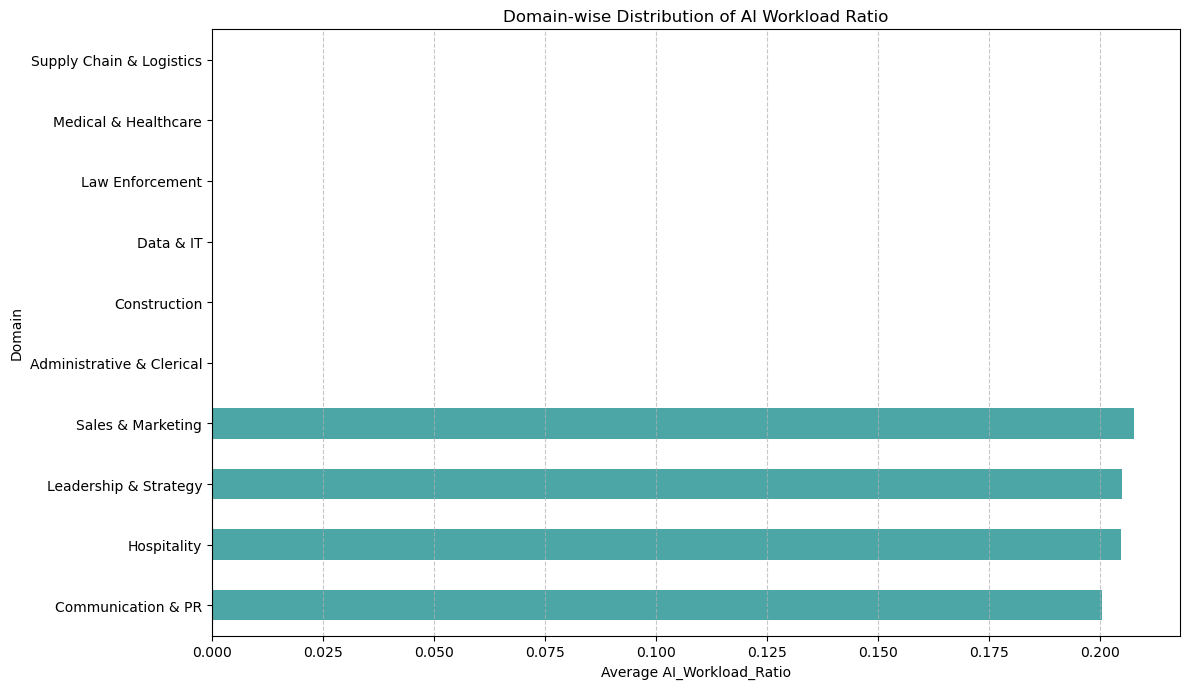

In [24]:
# Grouping by 'Domain' and calculating the mean AI_Workload_Ratio for each domain
domain_workload_mean = data_df.groupby('Domain')['AI_Workload_Ratio'].mean()

# Plotting the domain-wise distribution of AI_Workload_Ratio
plt.figure(figsize=(12, 7))
domain_workload_mean.sort_values().plot(kind='barh', color='teal', alpha=0.7)
plt.title('Domain-wise Distribution of AI Workload Ratio')
plt.xlabel('Average AI_Workload_Ratio')
plt.ylabel('Domain')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**AI impact on roles representing leadership or top management:**

**Top 10 Management Roles by AI_Workload_Ratio:**

Front Office Manager - 0.50 AI_Workload_Ratio
Sports Director - 0.41 AI_Workload_Ratio
Sales Operations Manager - 0.39 AI_Workload_Ratio
Process Improvement Manager - 0.39 AI_Workload_Ratio
Retail Sales Manager - 0.39 AI_Workload_Ratio
Recruiting Manager - 0.38 AI_Workload_Ratio
Shipping Manager - 0.37 AI_Workload_Ratio
Salon Manager - 0.37 AI_Workload_Ratio
Database Manager - 0.36 AI_Workload_Ratio
Regional Property Manager - 0.36 AI_Workload_Ratio

**Top 10 Management Roles by AI Impact:**

* > Communications Manager - 98% AI Impact
* > Chief Executive Officer (CEO) - 91% AI Impact
* > Chief Strategy Officer - 90% AI Impact
* > Development Manager - 89% AI Impact
* > Chief Security Officer - 88% AI Impact
* > Director Of Operations - 87% AI Impact
* > Chief Communications Officer - 85% AI Impact
* > Executive Assistant - 85% AI Impact
* > Bakery Manager - 84% AI Impact
> Banquet Manager - 83% AI Impact

**It's noteworthy that while some top management roles have high AI_Workload_Ratios, indicating a significant part of their tasks being managed or influenced by AI, other roles have high AI Impact percentages, suggesting that a large portion of their tasks can potentially be taken over by AI.**

In [25]:
# Filtering roles that represent top management or leadership
management_roles = ['CEO', 'Director', 'Manager', 'Executive', 'Chief', 'President', 'Vice President', 'Head']

management_data = data_df[data_df['Job titiles'].str.contains('|'.join(management_roles), case=False, na=False)]

# Sorting based on AI_Workload_Ratio and AI Impact
management_sorted_workload = management_data.sort_values(by='AI_Workload_Ratio', ascending=False).head(10)
management_sorted_impact = management_data.sort_values(by='AI Impact', ascending=False).head(10)

management_sorted_workload[['Job titiles', 'AI_Workload_Ratio']], management_sorted_impact[['Job titiles', 'AI Impact']]


(                      Job titiles  AI_Workload_Ratio
 3358         Front Office Manager           0.500000
 2404              Sports Director           0.405797
 2270     Sales Operations Manager           0.390000
 2256  Process Improvement Manager           0.388186
 2571         Retail Sales Manager           0.385163
 2257           Recruiting Manager           0.382465
 2397             Shipping Manager           0.372822
 2259                Salon Manager           0.372130
 1166             Database Manager           0.364464
 2633    Regional Property Manager           0.363689,
                       Job titiles  AI Impact
 0          Communications Manager       0.98
 5   Chief Executive Officer (CEO)       0.91
 7          Chief Strategy Officer       0.90
 20            Development Manager       0.89
 22         Chief Security Officer       0.88
 25         Director Of Operations       0.87
 27   Chief Communications Officer       0.85
 29            Executive Assistant   

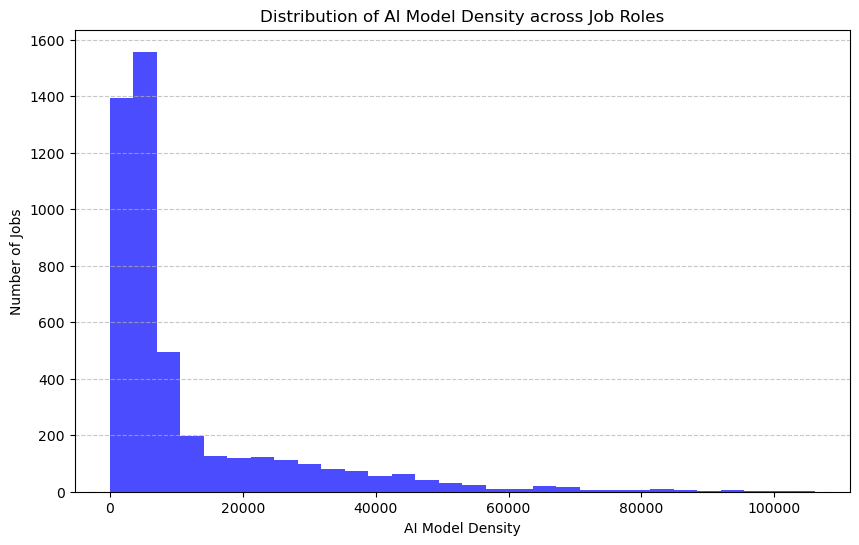

In [26]:
# Plotting the distribution of AI Model Density across all job roles
plt.figure(figsize=(10, 6))
plt.hist(data_df['AI Model Density'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of AI Model Density across Job Roles')
plt.xlabel('AI Model Density')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [27]:
# Sorting the dataset based on the number of AI models
highest_ai_models_jobs = data_df.sort_values(by='AI models', ascending=False).head(10)
lowest_ai_models_jobs = data_df.sort_values(by='AI models', ascending=True).head(10)

highest_ai_models_jobs[['Job titiles', 'AI models']], lowest_ai_models_jobs[['Job titiles', 'AI models']]


(                  Job titiles  AI models
 3521   Instructional Designer       5666
 3801        Junior Copywriter       5425
 3397  Senior Technical Writer       5371
 3396            Script Writer       5364
 3759      Business Specialist       5360
 3990        Technical Manager       5328
 3400                   Writer       5319
 3787  Chief Marketing Officer       5313
 3415        Program Associate       5313
 4562            Event Planner       5304,
                Job titiles  AI models
 3035      Commercial Pilot          0
 3184           Dog Groomer          0
 3211             Constable          0
 3037       Corporate Pilot          0
 3322        Crossing Guard          0
 3036             Conductor          0
 3034         Charter Pilot          0
 3058  After School Teacher          1
 413     Safety Coordinator          2
 3358  Front Office Manager          2)

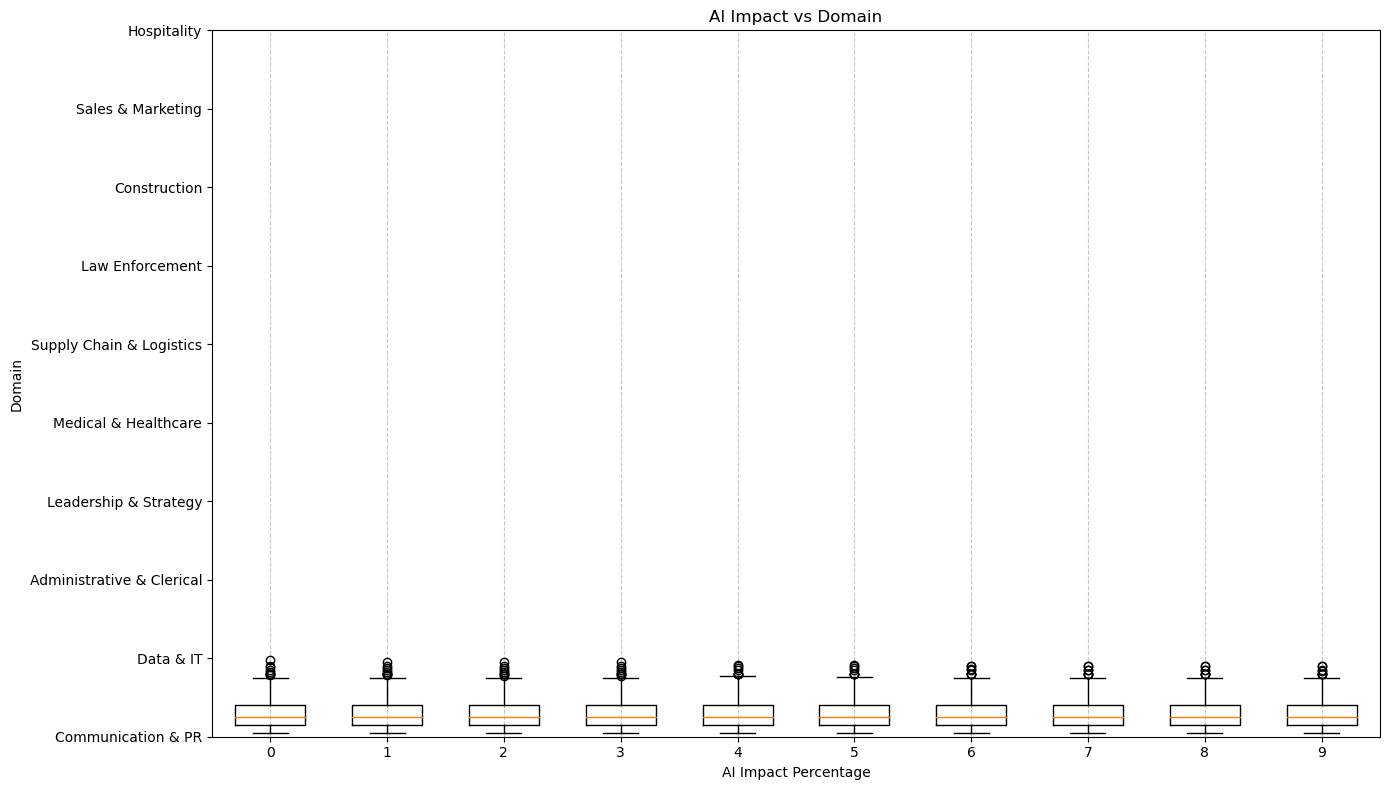

In [28]:
# Plotting AI Impact against Domains using Matplotlib
plt.figure(figsize=(14, 8))
for domain in data_df['Domain'].unique():
    domain_data = data_df[data_df['Domain'] == domain]['AI Impact']
    plt.boxplot(domain_data, positions=[list(data_df['Domain'].unique()).index(domain)], widths=0.6)

plt.yticks(ticks=range(len(data_df['Domain'].unique())), labels=data_df['Domain'].unique())
plt.title('AI Impact vs Domain')
plt.xlabel('AI Impact Percentage')
plt.ylabel('Domain')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [29]:
# Calculating the difference between AI Impact and AI_Workload_Ratio
data_df['AI Disproportion'] = data_df['AI Impact'] - data_df['AI_Workload_Ratio']

# Sorting the dataset based on AI Disproportion
highest_disproportion_jobs = data_df.sort_values(by='AI Disproportion', ascending=False).head(10)
lowest_disproportion_jobs = data_df.sort_values(by='AI Disproportion', ascending=True).head(10)

highest_disproportion_jobs[['Job titiles', 'AI Impact', 'AI_Workload_Ratio', 'AI Disproportion']], lowest_disproportion_jobs[['Job titiles', 'AI Impact', 'AI_Workload_Ratio', 'AI Disproportion']]


(                      Job titiles  AI Impact  AI_Workload_Ratio  \
 16                 Street Sweeper       0.90           0.036585   
 0          Communications Manager       0.98           0.143362   
 21                Delivery Driver       0.88           0.064725   
 1                  Data Collector       0.95           0.139199   
 3                      Mail Clerk       0.95           0.141288   
 2                      Data Entry       0.95           0.142669   
 18               Warehouse Worker       0.90           0.112026   
 6                       Therapist       0.90           0.115972   
 4              Compliance Officer       0.92           0.141709   
 5   Chief Executive Officer (CEO)       0.91           0.134802   
 
     AI Disproportion  
 16          0.863415  
 0           0.836638  
 21          0.815275  
 1           0.810801  
 3           0.808712  
 2           0.807331  
 18          0.787974  
 6           0.784028  
 4           0.778291  
 5        

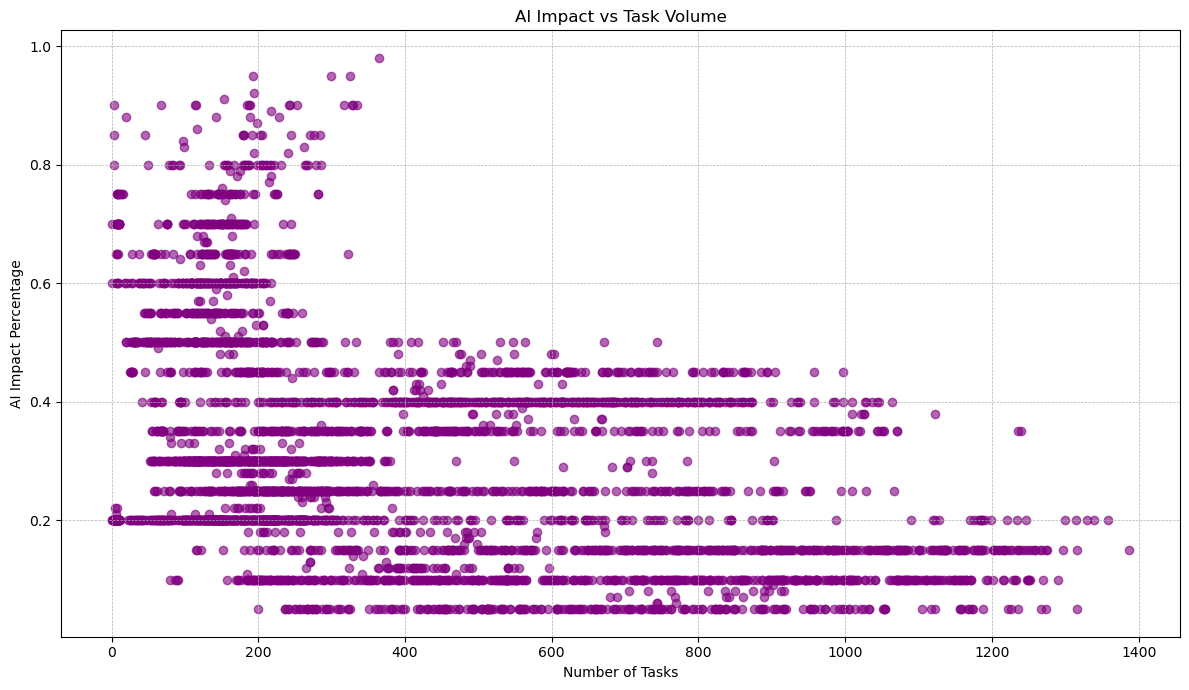

In [30]:
# Plotting AI Impact against Task Volume
plt.figure(figsize=(12, 7))
plt.scatter(data_df['Tasks'], data_df['AI Impact'], alpha=0.6, color='purple')
plt.title('AI Impact vs Task Volume')
plt.xlabel('Number of Tasks')
plt.ylabel('AI Impact Percentage')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [31]:
# Grouping by 'Domain' and calculating the mean difference between AI Impact and AI_Workload_Ratio
domain_ai_potential = data_df.groupby('Domain')['AI Disproportion'].mean().sort_values(ascending=False).head(5)

domain_ai_potential


Domain
Communication & PR           0.103462
Leadership & Strategy        0.098372
Hospitality                  0.097928
Sales & Marketing            0.095279
Administrative & Clerical         NaN
Name: AI Disproportion, dtype: float64

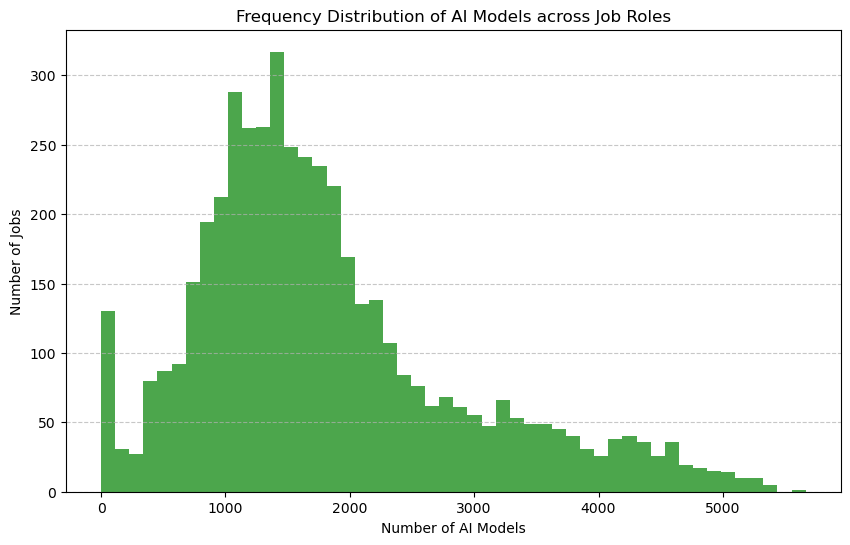

In [32]:
# Plotting the frequency distribution of the number of AI models across job roles
plt.figure(figsize=(10, 6))
plt.hist(data_df['AI models'], bins=50, color='green', alpha=0.7)
plt.title('Frequency Distribution of AI Models across Job Roles')
plt.xlabel('Number of AI Models')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [33]:
# Calculating the correlation between 'Tasks' and 'AI Impact'
correlation_tasks_impact = data_df[['Tasks', 'AI Impact']].corr()

correlation_value_tasks_impact = correlation_tasks_impact.loc['Tasks', 'AI Impact']
correlation_value_tasks_impact


-0.4197595382909163

In [34]:
# Filtering jobs with no AI models but with AI Impact greater than 75% (considered high impact)
high_impact_no_models = data_df[(data_df['AI models'] == 0) & (data_df['AI Impact'] > 0.75)]

high_impact_no_models[['Job titiles', 'AI Impact', 'AI models']]


,Job titiles,AI Impact,AI models


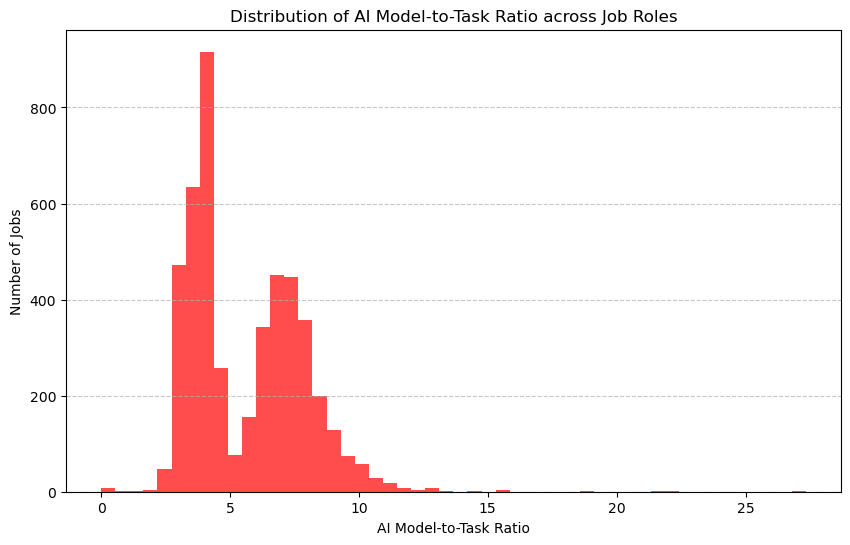

In [35]:
# Plotting the distribution of AI Model-to-Task Ratio across all job roles
plt.figure(figsize=(10, 6))
plt.hist(data_df['AI Model-to-Task Ratio'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of AI Model-to-Task Ratio across Job Roles')
plt.xlabel('AI Model-to-Task Ratio')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
